<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/8_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/jay-kanakia/Deep-Learning-CampusX/refs/heads/main/Datasets/Social_Network_Ads.csv')

In [4]:
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
371,15774744,Male,60,83000,1
359,15709183,Male,42,54000,0


In [5]:
df.drop(columns=['User ID'],inplace=True)
df.sample(2)

,Gender,Age,EstimatedSalary,Purchased
2,Female,26,43000,0
350,Female,38,113000,1


In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)


In [9]:
ohe.get_feature_names_out()

array(['Gender_Male'], dtype=object)

In [12]:
df[ohe.get_feature_names_out()]=pd.DataFrame(ohe.fit_transform(df[['Gender']]),columns=ohe.get_feature_names_out(),index=df.index)

In [13]:
df.sample(1)

,Gender,Age,EstimatedSalary,Purchased,Gender_Male
154,Male,40,47000,0,1.0


In [14]:
df.drop(columns=['Gender'],inplace=True)

In [15]:
df.sample(1)

,Age,EstimatedSalary,Purchased,Gender_Male
30,31,74000,0,1.0


In [16]:
X=df.drop(columns=['Purchased'])
y=df['Purchased']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(X_train,y_train,epochs=300,validation_split=0.2)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6269 - loss: 2157.8416 - val_accuracy: 0.3125 - val_loss: 763.8318
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4128 - loss: 569.1951 - val_accuracy: 0.6875 - val_loss: 403.3219
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6360 - loss: 326.7341 - val_accuracy: 0.3125 - val_loss: 285.9355
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4248 - loss: 154.7084 - val_accuracy: 0.3125 - val_loss: 37.8339
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5017 - loss: 69.4583 - val_accuracy: 0.6875 - val_loss: 30.0736
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6037 - loss: 39.9947 - val_accuracy: 0.3125 - val_loss: 3.4398
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4872 - loss: 59.0226 - val_accuracy: 0.6875 - val_loss: 95.9909
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6281 - loss: 160.2420 - val_accur

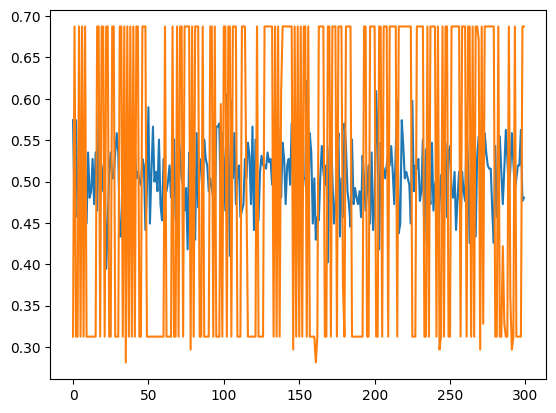

In [22]:
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])
plt.show()

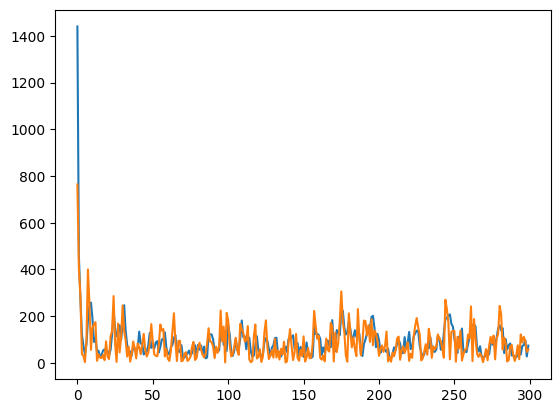

In [23]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.show()

In [24]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [26]:
model1=Sequential()
model1.add(Dense(256,activation='relu',input_dim=X_train.shape[1]))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history1=model1.fit(X_train_scaled,y_train,epochs=300,validation_split=0.2)

Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.6958 - loss: 0.6625 - val_accuracy: 0.8906 - val_loss: 0.6173
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8676 - loss: 0.5960 - val_accuracy: 0.8750 - val_loss: 0.5647
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8683 - loss: 0.5472 - val_accuracy: 0.8594 - val_loss: 0.5233
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8346 - loss: 0.5324 - val_accuracy: 0.8750 - val_loss: 0.4874
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8474 - loss: 0.4669 - val_accuracy: 0.8906 - val_loss: 0.4578
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8380 - loss: 0.4550 - val_accuracy: 0.8906 - val_loss: 0.4331
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8568 - loss: 0.4165 - val_accuracy: 0.8906 - val_loss: 0.4115
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8613 - loss: 0.3993 - val_accuracy: 0.8906 - val_loss: 0.3940
Epo

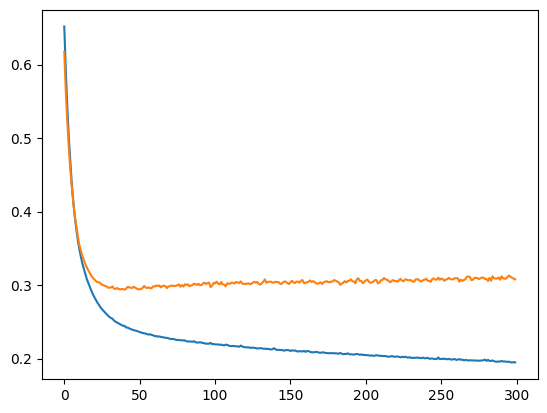

In [27]:
sns.lineplot(history1.history['loss'])
sns.lineplot(history1.history['val_loss'])
plt.show()

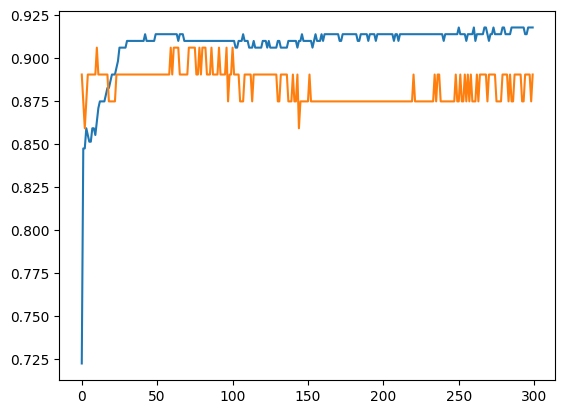

In [28]:
sns.lineplot(history1.history['accuracy'])
sns.lineplot(history1.history['val_accuracy'])
plt.show()